<a href="https://colab.research.google.com/github/hashi-kavi/My-ML-projects/blob/main/insurance_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Prediction

Dataset: Medical Cost Personal Datasets (Ref: https://www.kaggle.com/datasets/mirichoi0218/insurance/data)

Features:
> age: age of primary beneficiary <br>
> sex: insurance contractor gender, female, male <br>
> bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height. <br>
> children: Number of children covered by health insurance / Number of dependents. <br>
> smoker: Smoking. <br>
> region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. <br>
> charges: Individual medical costs billed by health insurance. <br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Loading

In [ ]:
# Import the necessary libaries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data as a pandas dataframe

df = pd.read_csv("/content/drive/MyDrive/machine learning/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Print the shape of the dataframe

df.shape

(1338, 7)

In [ ]:
# Print a concise summary of the pandas dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Data Preprocessing and EDA

In [ ]:
# Seperate the independent and dependent variables
X = df.drop('charges',axis=1)
y = df.charges

In [ ]:
# Display the first 5 data points

X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
# Diplay first five corresponding targets

y[:5]

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_valtrain, X_test, y_valtrain, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Lenth of the training + validation sets
len(X_valtrain)

1003

In [ ]:
#1st run
X_valtrain.head()

,age,sex,bmi,children,smoker,region
693,24,male,23.655,0,no,northwest
1297,28,female,26.510,2,no,southeast
634,51,male,39.700,1,no,southwest
1022,47,male,36.080,1,yes,southeast
178,46,female,28.900,2,no,southwest


In [ ]:
#2nd run
X_valtrain.head()

,age,sex,bmi,children,smoker,region
693,24,male,23.655,0,no,northwest
1297,28,female,26.510,2,no,southeast
634,51,male,39.700,1,no,southwest
1022,47,male,36.080,1,yes,southeast
178,46,female,28.900,2,no,southwest


In [ ]:
# Length of the testing set
len(X_test)

335

**EDA**

In [ ]:
# Describe the charateristics of the numerical features in the training set
X_valtrain.describe()

,age,bmi,children
count,1003.000000,1003.000000,1003.000000
mean,39.255234,30.511780,1.104686
std,14.039105,6.013107,1.204619
min,18.000000,15.960000,0.000000
25%,27.000000,26.210000,0.000000
50%,39.000000,30.200000,1.000000
75%,51.000000,34.430000,2.000000
max,64.000000,53.130000,5.000000


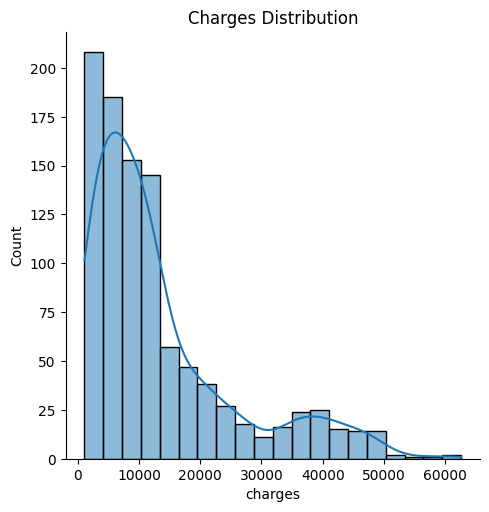

In [ ]:
# Check for the charges distribution

sns.displot(y_valtrain, kde=True, bins = 20).set(title = "Charges Distribution");

[Text(0.5, 1.0, 'Gender Distribution')]

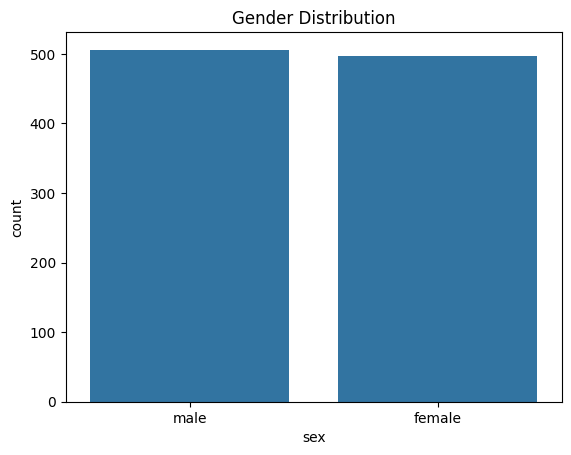

In [ ]:
# Check for the geneder distribution

sns.countplot(x = X_valtrain.sex).set(title = 'Gender Distribution')

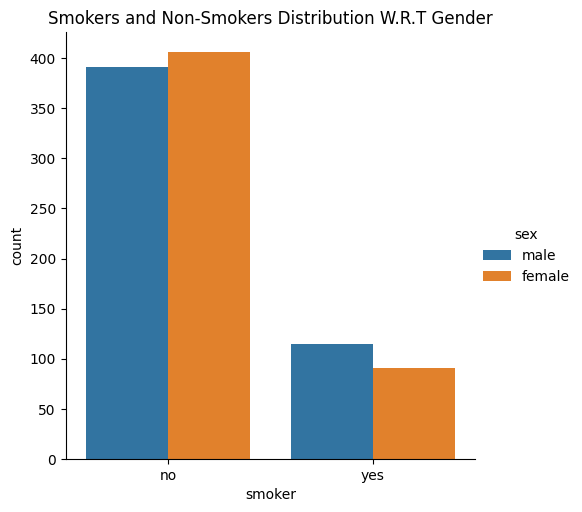

In [ ]:
# Check for the smoker distribution between genders

sns.catplot(x="smoker", kind="count", hue = 'sex', data=X_valtrain).set(title="Smokers and Non-Smokers Distribution W.R.T Gender");

In [ ]:
# Check for the charges distribution for smokers and non smorkers seperately
# But we have dropped the charges column before, therefore, we need to concatenate them once again

df_temp_train = pd.concat([X_valtrain, y_valtrain], axis=1)
df_temp_train.head()

,age,sex,bmi,children,smoker,region,charges
693,24,male,23.655,0,no,northwest,2352.96845
1297,28,female,26.510,2,no,southeast,4340.44090
634,51,male,39.700,1,no,southwest,9391.34600
1022,47,male,36.080,1,yes,southeast,42211.13820
178,46,female,28.900,2,no,southwest,8823.27900


Text(0.5, 1.0, 'Distribution of Charges for Non-Smowkers')

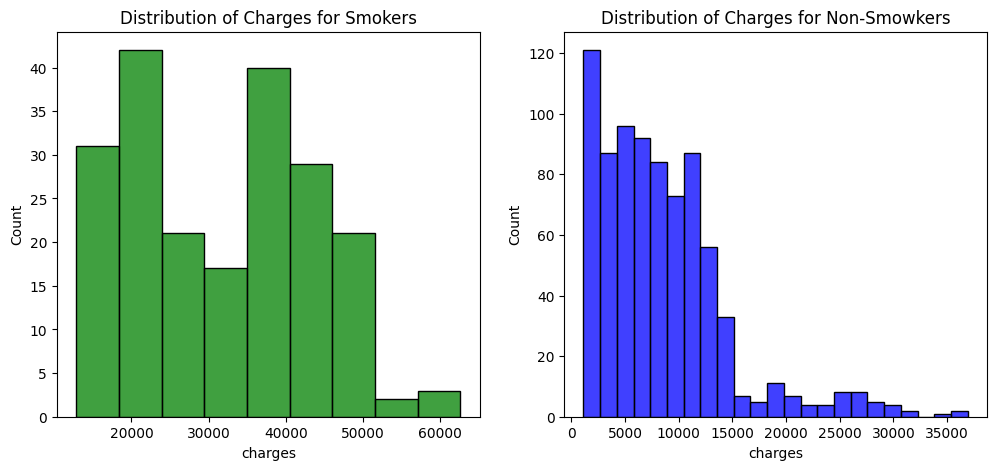

In [ ]:
fig = plt.figure(figsize=(12,5))

ax=fig.add_subplot(121)
sns.histplot(df_temp_train[(df_temp_train.smoker == 'yes')]["charges"],color='g',ax=ax)
ax.set_title('Distribution of Charges for Smokers')

ax=fig.add_subplot(122)
sns.histplot(df_temp_train[(df_temp_train.smoker == 'no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of Charges for Non-Smowkers')

Text(0.5, 1.0, 'Scatter Plot of Charges and Bmi')

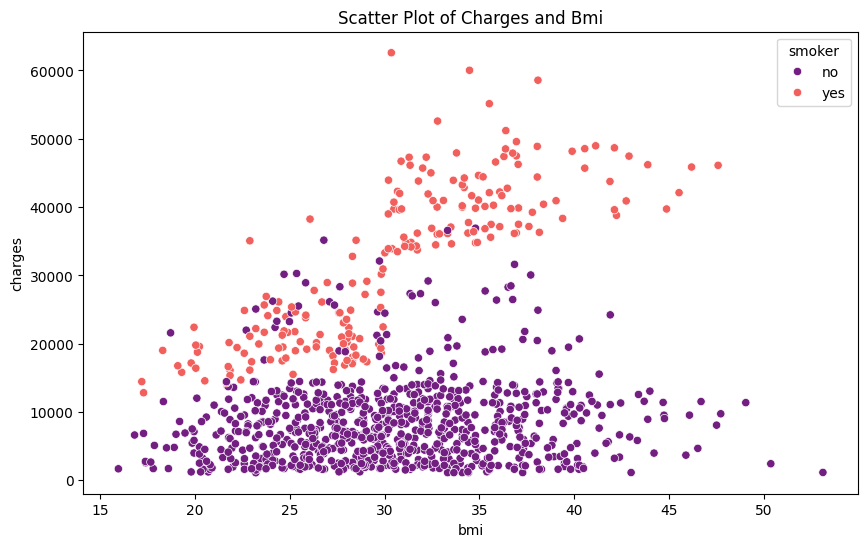

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='bmi',y='charges',data=df_temp_train, palette='magma',hue='smoker')
ax.set_title('Scatter Plot of Charges and Bmi')

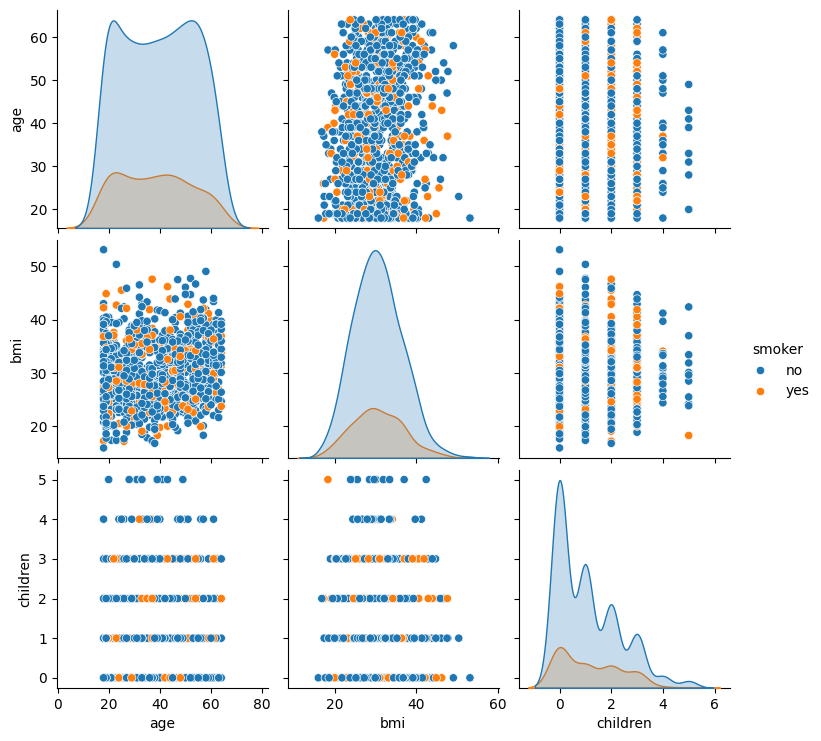

In [ ]:
sns.pairplot(X_valtrain, hue="smoker");

**Data Pre-Processing**

Null Values

In [ ]:
X_valtrain.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0


In [ ]:
X_test.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0


> So no null values can be found in either training or the testing set. So we do not want to treat them.

Categorical Features

In [ ]:
# Reprint the dataset information
X_valtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 693 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 54.9+ KB


In [ ]:
# Print the unique values in the 'sex' column
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
# Print the unique values in the 'smoker' column
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
# Print the unique values in the 'region' column
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

# List the categorial features
cat_features = ['sex', 'smoker', 'region']

# Define the encoder
transformer = make_column_transformer(
    (
        OneHotEncoder(drop = 'first', handle_unknown = 'ignore', dtype = np.int64, sparse_output=False),
        cat_features
    )
)

# Encode the training features
transformed = transformer.fit_transform(X_valtrain)
transformed_df = pd.DataFrame(transformed, columns= transformer.get_feature_names_out())
transformed_df.index = X_valtrain.index
X_valtrain = pd.concat([X_valtrain, transformed_df], axis = 1)
X_valtrain.drop(cat_features, axis=1, inplace=True)
X_valtrain.head()

,age,bmi,children,onehotencoder__sex_male,onehotencoder__smoker_yes,onehotencoder__region_northwest,onehotencoder__region_southeast,onehotencoder__region_southwest
693,24,23.655,0,1,0,1,0,0
1297,28,26.510,2,0,0,0,1,0
634,51,39.700,1,1,0,0,0,1
1022,47,36.080,1,1,1,0,1,0
178,46,28.900,2,0,0,0,0,1


In [ ]:
# Check the datatypes of the the Pandas dataframe after the transformation
X_valtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 693 to 1126
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1003 non-null   int64  
 1   bmi                              1003 non-null   float64
 2   children                         1003 non-null   int64  
 3   onehotencoder__sex_male          1003 non-null   int64  
 4   onehotencoder__smoker_yes        1003 non-null   int64  
 5   onehotencoder__region_northwest  1003 non-null   int64  
 6   onehotencoder__region_southeast  1003 non-null   int64  
 7   onehotencoder__region_southwest  1003 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 70.5 KB


In [ ]:
# Encode the test dataset
transformed_t = transformer.transform(X_test)
transformed_dft = pd.DataFrame(transformed_t, columns=transformer.get_feature_names_out())
transformed_dft.index = X_test.index
X_test = pd.concat([X_test, transformed_dft], axis=1)
X_test.drop(cat_features, axis = 1, inplace=True)
X_test.head()

,age,bmi,children,onehotencoder__sex_male,onehotencoder__smoker_yes,onehotencoder__region_northwest,onehotencoder__region_southeast,onehotencoder__region_southwest
764,45,25.175,2,0,0,0,0,0
887,36,30.020,0,0,0,1,0,0
890,64,26.885,0,0,1,1,0,0
1293,46,25.745,3,1,0,1,0,0
259,19,31.920,0,1,1,1,0,0


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 764 to 1197
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              335 non-null    int64  
 1   bmi                              335 non-null    float64
 2   children                         335 non-null    int64  
 3   onehotencoder__sex_male          335 non-null    int64  
 4   onehotencoder__smoker_yes        335 non-null    int64  
 5   onehotencoder__region_northwest  335 non-null    int64  
 6   onehotencoder__region_southeast  335 non-null    int64  
 7   onehotencoder__region_southwest  335 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 23.6 KB


Nemerical Features

In [ ]:
# Check for the children attribute
X_valtrain['children'].unique()

array([0, 2, 1, 3, 4, 5])

> So the children attribute is also a categorical even though we have numerical values. It is somewhat similar to the label encoded feature. Therefore we may keep it as it is.

In [ ]:
# Standard Scale the numerical features
from sklearn.preprocessing import MinMaxScaler

num_features = ['age', 'bmi']

minmax_scalar = MinMaxScaler()
X_valtrain[num_features] = minmax_scalar.fit_transform(X_valtrain[num_features])
X_test[num_features] = minmax_scalar.transform(X_test[num_features])

In [ ]:
X_valtrain.head()

,age,bmi,children,onehotencoder__sex_male,onehotencoder__smoker_yes,onehotencoder__region_northwest,onehotencoder__region_southeast,onehotencoder__region_southwest
693,0.130435,0.207022,0,1,0,1,0,0
1297,0.217391,0.283831,2,0,0,0,1,0
634,0.717391,0.638687,1,1,0,0,0,1
1022,0.630435,0.541297,1,1,1,0,1,0
178,0.608696,0.348130,2,0,0,0,0,1


In [ ]:
X_test.head()

,age,bmi,children,onehotencoder__sex_male,onehotencoder__smoker_yes,onehotencoder__region_northwest,onehotencoder__region_southeast,onehotencoder__region_southwest
764,0.586957,0.247915,2,0,0,0,0,0
887,0.391304,0.378262,0,0,0,1,0,0
890,1.000000,0.293920,0,0,1,1,0,0
1293,0.608696,0.263250,3,1,0,1,0,0
259,0.021739,0.429379,0,1,1,1,0,0


###  ML Model Implementation & Evaluation

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_valtrain, y_valtrain)
reg.score(X_valtrain, y_valtrain)

0.7449555328228536

In [ ]:
reg.score(X_test, y_test)

0.7672642952734356

In [ ]:
# Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error

y_valtrain_preds = reg.predict(X_valtrain)
y_test_preds = reg.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error

y_valtrain_preds = reg.predict(X_valtrain)
y_test_preds = reg.predict(X_test)

R2 Error (Train set):  0.7449555328228536
R2 Error (Test set):  0.7672642952734356


In [ ]:
# Mean Squred Error
print("Mean Squred Error (Train set): ", mean_squared_error(y_valtrain, y_valtrain_preds))
print("Mean Squred Error (Test set): ", mean_squared_error(y_test, y_test_preds))

Mean Squred Error (Train set):  37004502.18409475
Mean Squred Error (Test set):  35117755.736136325


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, max_depth=5)
rf.fit(X_valtrain, y_valtrain)

RandomForestRegressor(max_depth=5, n_estimators=10)

In [ ]:
rf.score(X_valtrain, y_valtrain)

0.8857352351401736

In [ ]:
rf.score(X_test, y_test)

0.8600786083546982

In [ ]:
y_valtrain_preds_rf = rf.predict(X_valtrain)
y_test_preds_rf = rf.predict(X_test)

In [ ]:
# R2 Error
print("R2 Error (Train set): ", r2_score(y_valtrain, y_valtrain_preds_rf))
print("R2 Error (Test set): ", r2_score(y_test, y_test_preds_rf))

R2 Error (Train set):  0.8857352351401736
R2 Error (Test set):  0.8600786083546982


In [ ]:
# Mean Squred Error
print("Mean Squred Error (Train set): ", mean_squared_error(y_valtrain, y_valtrain_preds_rf))
print("Mean Squred Error (Test set): ", mean_squared_error(y_test, y_test_preds_rf))

Mean Squred Error (Train set):  16578719.733150143
Mean Squred Error (Test set):  21112898.25440834


Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate

lr_cv = LinearRegression()
cv_results = cross_validate(lr_cv, X_valtrain, y_valtrain, scoring = 'r2', cv = 5)
cv_results['test_score']

array([0.7542241 , 0.79906137, 0.71170117, 0.64863877, 0.76543031])

In [ ]:
lr_cv.fit(X_valtrain, y_valtrain)

LinearRegression()

In [ ]:
lr_cv.score(X_valtrain, y_valtrain)

0.7449555328228536

In [ ]:
lr_cv.score(X_test, y_test)

0.7672642952734356

In [ ]:
rf_cv = RandomForestRegressor(n_estimators=10, max_depth=5)
cv_results = cross_validate(rf_cv, X_valtrain, y_valtrain, scoring = 'r2', cv = 5)
cv_results['test_score']

array([0.85873735, 0.90349066, 0.8203027 , 0.77446418, 0.84117899])

In [ ]:
rf_cv.fit(X_valtrain, y_valtrain)

RandomForestRegressor(max_depth=5, n_estimators=10)

In [ ]:
rf_cv.score(X_valtrain, y_valtrain)

0.8872884254907928

In [ ]:
rf_cv.score(X_test, y_test)

0.855774940485869